# PyCity Schools Analysis

- Your analysis here
  
---

In [76]:
# Dependencies and Setup
import pandas as pd
from pathlib import Path

# File to Load (Remember to Change These)
school_data_to_load = Path("Resources/schools_complete.csv")
student_data_to_load = Path("Resources/students_complete.csv")

# Read School and Student Data File and store into Pandas DataFrames
school_data = pd.read_csv(school_data_to_load)
student_data = pd.read_csv(student_data_to_load)

# Combine the data into a single dataset.  
school_data_complete = pd.merge(student_data, school_data, how="left", on=["school_name", "school_name"])
school_data_complete.head()

,Student ID,student_name,gender,grade,school_name,reading_score,math_score,School ID,type,size,budget
0,0,Paul Bradley,M,9th,Huang High School,66,79,0,District,2917,1910635
1,1,Victor Smith,M,12th,Huang High School,94,61,0,District,2917,1910635
2,2,Kevin Rodriguez,M,12th,Huang High School,90,60,0,District,2917,1910635
3,3,Dr. Richard Scott,M,12th,Huang High School,67,58,0,District,2917,1910635
4,4,Bonnie Ray,F,9th,Huang High School,97,84,0,District,2917,1910635



District Summary

In [77]:
# Calculate the total number of unique schools
school_count = school_data_complete["school_name"].nunique()
school_count


15

In [78]:
# Calculate the total number of students
student_count = school_data_complete["student_name"].count()
student_count

39170

In [79]:
# Calculate the total budget
total_budget =school_data["budget"].sum()
total_budget

24649428

In [80]:
# Calculate the average (mean) math score
average_math_score = school_data_complete["math_score"].mean()
average_math_score

78.98537145774827

In [81]:
# Calculate the average (mean) reading score
average_reading_score = school_data_complete["reading_score"].mean()
average_reading_score

81.87784018381414

In [82]:
# Use the following to calculate the percentage of students who passed math (math scores greather than or equal to 70)

passing_math_percentage = (school_data_complete["math_score"] >= 70).mean() * 100

passing_math_percentage

74.9808526933878

In [83]:
# Calculate the percentage of students who passed reading (hint: look at how the math percentage was calculated)  

passing_reading_percentage = (school_data_complete["reading_score"] >= 70).mean() * 100

passing_reading_percentage

85.80546336482001

In [84]:
# Calculate % overall passing
overall_passing_rate = ((school_data_complete["math_score"] >= 70) & (school_data_complete["reading_score"] >= 70)).mean() * 100

overall_passing_rate 

65.17232575950983

In [85]:
# Create a high-level snapshot of the district's key metrics in a DataFrame
district_summary =  pd.DataFrame({
    "Total Schools": [school_count],
    "Total Students": [student_count],
    "Total Budget": [total_budget],
    "Average Math Score": [average_math_score],
    "Average Reading Score":[average_reading_score],
    "% Passing Math": [ passing_math_percentage],
    "% Passing Reading": [passing_reading_percentage],
    "% Overall Passing": [overall_passing_rate]
})

# Formatting
district_summary["Total Students"] = district_summary["Total Students"].map("{:,}".format)
district_summary["Total Budget"] = district_summary["Total Budget"].map("${:,.2f}".format)

# Display the DataFrame
district_summary

,Total Schools,Total Students,Total Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing
0,15,"39,170","$24,649,428.00",78.985371,81.87784,74.980853,85.805463,65.172326


## School Summary

In [86]:
# Use the code provided to select all of the school types

school_grouped = school_data_complete.groupby("school_name")
school_types = school_data.set_index("school_name")["type"]
school_types


school_name
Huang High School        District
Figueroa High School     District
Shelton High School       Charter
Hernandez High School    District
Griffin High School       Charter
Wilson High School        Charter
Cabrera High School       Charter
Bailey High School       District
Holden High School        Charter
Pena High School          Charter
Wright High School        Charter
Rodriguez High School    District
Johnson High School      District
Ford High School         District
Thomas High School        Charter
Name: type, dtype: object

In [87]:
# Calculate the total student count per school
total_student_per_school = school_grouped["Student ID"].count()
total_student_per_school

school_name
Bailey High School       4976
Cabrera High School      1858
Figueroa High School     2949
Ford High School         2739
Griffin High School      1468
Hernandez High School    4635
Holden High School        427
Huang High School        2917
Johnson High School      4761
Pena High School          962
Rodriguez High School    3999
Shelton High School      1761
Thomas High School       1635
Wilson High School       2283
Wright High School       1800
Name: Student ID, dtype: int64

In [88]:
# Calculate the total school budget and per capita spending per school
total_school_budget = school_data.set_index("school_name")["budget"]
total_school_budget 

school_name
Huang High School        1910635
Figueroa High School     1884411
Shelton High School      1056600
Hernandez High School    3022020
Griffin High School       917500
Wilson High School       1319574
Cabrera High School      1081356
Bailey High School       3124928
Holden High School        248087
Pena High School          585858
Wright High School       1049400
Rodriguez High School    2547363
Johnson High School      3094650
Ford High School         1763916
Thomas High School       1043130
Name: budget, dtype: int64

In [89]:
per_student_budget= total_school_budget/total_student_per_school
per_student_budget


school_name
Bailey High School       628.0
Cabrera High School      582.0
Figueroa High School     639.0
Ford High School         644.0
Griffin High School      625.0
Hernandez High School    652.0
Holden High School       581.0
Huang High School        655.0
Johnson High School      650.0
Pena High School         609.0
Rodriguez High School    637.0
Shelton High School      600.0
Thomas High School       638.0
Wilson High School       578.0
Wright High School       583.0
dtype: float64

In [90]:
# Calculate the average test(math) scores per school
average_math_score_per_school = school_grouped["math_score"].mean()
average_math_score_per_school


school_name
Bailey High School       77.048432
Cabrera High School      83.061895
Figueroa High School     76.711767
Ford High School         77.102592
Griffin High School      83.351499
Hernandez High School    77.289752
Holden High School       83.803279
Huang High School        76.629414
Johnson High School      77.072464
Pena High School         83.839917
Rodriguez High School    76.842711
Shelton High School      83.359455
Thomas High School       83.418349
Wilson High School       83.274201
Wright High School       83.682222
Name: math_score, dtype: float64

In [91]:
# Calculate the average test(reading) scores per school
average_reading_score_per_school = school_grouped["reading_score"].mean()
average_reading_score_per_school

school_name
Bailey High School       81.033963
Cabrera High School      83.975780
Figueroa High School     81.158020
Ford High School         80.746258
Griffin High School      83.816757
Hernandez High School    80.934412
Holden High School       83.814988
Huang High School        81.182722
Johnson High School      80.966394
Pena High School         84.044699
Rodriguez High School    80.744686
Shelton High School      83.725724
Thomas High School       83.848930
Wilson High School       83.989488
Wright High School       83.955000
Name: reading_score, dtype: float64

In [92]:
# Use the provided code to calculate the passing rates(math)

passing_math_per_school = (school_data_complete[school_data_complete["math_score"] >= 70]
                                      .groupby("school_name")["Student ID"].count() / total_student_per_school) * 100
passing_math_per_school


school_name
Bailey High School       66.680064
Cabrera High School      94.133477
Figueroa High School     65.988471
Ford High School         68.309602
Griffin High School      93.392371
Hernandez High School    66.752967
Holden High School       92.505855
Huang High School        65.683922
Johnson High School      66.057551
Pena High School         94.594595
Rodriguez High School    66.366592
Shelton High School      93.867121
Thomas High School       93.272171
Wilson High School       93.867718
Wright High School       93.333333
Name: Student ID, dtype: float64

In [93]:
# Use the provided code to calculate the passing rates(reading)

passing_reading_per_school = (school_data_complete[school_data_complete["reading_score"] >= 70]
                              .groupby("school_name")["Student ID"].count() / total_student_per_school) * 100
passing_reading_per_school

school_name
Bailey High School       81.933280
Cabrera High School      97.039828
Figueroa High School     80.739234
Ford High School         79.299014
Griffin High School      97.138965
Hernandez High School    80.862999
Holden High School       96.252927
Huang High School        81.316421
Johnson High School      81.222432
Pena High School         95.945946
Rodriguez High School    80.220055
Shelton High School      95.854628
Thomas High School       97.308869
Wilson High School       96.539641
Wright High School       96.611111
Name: Student ID, dtype: float64

In [94]:
# Use the provided code to calculate the passing rates (math_reading)

overall_passing_per_school = (school_data_complete[(school_data_complete["math_score"] >= 70) & (school_data_complete["reading_score"] >= 70)]
                              .groupby("school_name")["Student ID"].count() / total_student_per_school) * 100
overall_passing_per_school

school_name
Bailey High School       54.642283
Cabrera High School      91.334769
Figueroa High School     53.204476
Ford High School         54.289887
Griffin High School      90.599455
Hernandez High School    53.527508
Holden High School       89.227166
Huang High School        53.513884
Johnson High School      53.539172
Pena High School         90.540541
Rodriguez High School    52.988247
Shelton High School      89.892107
Thomas High School       90.948012
Wilson High School       90.582567
Wright High School       90.333333
Name: Student ID, dtype: float64

In [95]:
# Create a DataFrame called `per_school_summary` with columns for the calculations above.


per_school_summary =  pd.DataFrame({
    "School Type": school_types,
    "Total Students": total_student_per_school,
    "Total School Budget": total_school_budget,
    "Per Student Budget": per_student_budget,
    "Average Math Score": average_math_score_per_school,
    "Average Reading Score": average_reading_score_per_school,
    "% Passing Math": passing_math_per_school,
    "% Passing Reading": passing_reading_per_school,
    "% Overall Passing": overall_passing_per_school})


# Formatting
per_school_summary["Total School Budget"] = per_school_summary["Total School Budget"].map("${:,.2f}".format)
per_school_summary["Per Student Budget"] = per_school_summary["Per Student Budget"].map("${:,.2f}".format)

# Display the DataFrame
per_school_summary



,School Type,Total Students,Total School Budget,Per Student Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing
school_name,,,,,,,,,
Bailey High School,District,4976,"$3,124,928.00",$628.00,77.048432,81.033963,66.680064,81.933280,54.642283
Cabrera High School,Charter,1858,"$1,081,356.00",$582.00,83.061895,83.975780,94.133477,97.039828,91.334769
Figueroa High School,District,2949,"$1,884,411.00",$639.00,76.711767,81.158020,65.988471,80.739234,53.204476
Ford High School,District,2739,"$1,763,916.00",$644.00,77.102592,80.746258,68.309602,79.299014,54.289887
Griffin High School,Charter,1468,"$917,500.00",$625.00,83.351499,83.816757,93.392371,97.138965,90.599455
Hernandez High School,District,4635,"$3,022,020.00",$652.00,77.289752,80.934412,66.752967,80.862999,53.527508
Holden High School,Charter,427,"$248,087.00",$581.00,83.803279,83.814988,92.505855,96.252927,89.227166
Huang High School,District,2917,"$1,910,635.00",$655.00,76.629414,81.182722,65.683922,81.316421,53.513884
Johnson High School,District,4761,"$3,094,650.00",$650.00,77.072464,80.966394,66.057551,81.222432,53.539172


## Highest-Performing Schools (by % Overall Passing)

In [96]:
# Sort the schools by `% Overall Passing` in descending order and display the top 5 rows.
top_schools = per_school_summary.sort_values("% Overall Passing", ascending=False).head(5)
top_schools.head(5)

,School Type,Total Students,Total School Budget,Per Student Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing
school_name,,,,,,,,,
Cabrera High School,Charter,1858,"$1,081,356.00",$582.00,83.061895,83.975780,94.133477,97.039828,91.334769
Thomas High School,Charter,1635,"$1,043,130.00",$638.00,83.418349,83.848930,93.272171,97.308869,90.948012
Griffin High School,Charter,1468,"$917,500.00",$625.00,83.351499,83.816757,93.392371,97.138965,90.599455
Wilson High School,Charter,2283,"$1,319,574.00",$578.00,83.274201,83.989488,93.867718,96.539641,90.582567
Pena High School,Charter,962,"$585,858.00",$609.00,83.839917,84.044699,94.594595,95.945946,90.540541


## Bottom Performing Schools (By % Overall Passing)

In [97]:
# Sort the schools by `% Overall Passing` in ascending order and display the top 5 rows.
bottom_schools = per_school_summary.sort_values("% Overall Passing", ascending=True).head(5)
bottom_schools.head(5)

,School Type,Total Students,Total School Budget,Per Student Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing
school_name,,,,,,,,,
Rodriguez High School,District,3999,"$2,547,363.00",$637.00,76.842711,80.744686,66.366592,80.220055,52.988247
Figueroa High School,District,2949,"$1,884,411.00",$639.00,76.711767,81.158020,65.988471,80.739234,53.204476
Huang High School,District,2917,"$1,910,635.00",$655.00,76.629414,81.182722,65.683922,81.316421,53.513884
Hernandez High School,District,4635,"$3,022,020.00",$652.00,77.289752,80.934412,66.752967,80.862999,53.527508
Johnson High School,District,4761,"$3,094,650.00",$650.00,77.072464,80.966394,66.057551,81.222432,53.539172


## Math Scores by Grade

In [98]:
# Use the code provided to separate the data by grade
ninth_graders = school_data_complete[(school_data_complete["grade"] == "9th")]
tenth_graders = school_data_complete[(school_data_complete["grade"] == "10th")]
eleventh_graders = school_data_complete[(school_data_complete["grade"] == "11th")]
twelfth_graders = school_data_complete[(school_data_complete["grade"] == "12th")]

# Group by `school_name` and take the mean of the `math_score` column for each.

ninth_grade_math_scores = ninth_graders.groupby("school_name")["math_score"].mean()
tenth_grade_math_scores = tenth_graders.groupby("school_name")["math_score"].mean()
eleventh_grade_math_scores = eleventh_graders.groupby("school_name")["math_score"].mean()
twelfth_grade_math_scores = twelfth_graders.groupby("school_name")["math_score"].mean()


# Combine each of the scores above into single DataFrame called `math_scores_by_grade`

math_scores_by_grade = pd.DataFrame({
    "9th": ninth_grade_math_scores,
    "10th": tenth_grade_math_scores,
    "11th": eleventh_grade_math_scores,
    "12th": twelfth_grade_math_scores})


# Minor data wrangling
math_scores_by_grade.index.name = None

# Display the DataFrame
math_scores_by_grade

,9th,10th,11th,12th
Bailey High School,77.083676,76.996772,77.515588,76.492218
Cabrera High School,83.094697,83.154506,82.765560,83.277487
Figueroa High School,76.403037,76.539974,76.884344,77.151369
Ford High School,77.361345,77.672316,76.918058,76.179963
Griffin High School,82.044010,84.229064,83.842105,83.356164
Hernandez High School,77.438495,77.337408,77.136029,77.186567
Holden High School,83.787402,83.429825,85.000000,82.855422
Huang High School,77.027251,75.908735,76.446602,77.225641
Johnson High School,77.187857,76.691117,77.491653,76.863248
Pena High School,83.625455,83.372000,84.328125,84.121547


## Reading Score by Grade 

In [99]:
# Use the code provided to separate the data by grade
ninth_graders = school_data_complete[(school_data_complete["grade"] == "9th")]
tenth_graders = school_data_complete[(school_data_complete["grade"] == "10th")]
eleventh_graders = school_data_complete[(school_data_complete["grade"] == "11th")]
twelfth_graders = school_data_complete[(school_data_complete["grade"] == "12th")]

# Group by `school_name` and take the mean of the the `reading_score` column for each.

ninth_grade_reading_scores = ninth_graders.groupby("school_name")["reading_score"].mean()
tenth_grade_reading_scores = tenth_graders.groupby("school_name")["reading_score"].mean()
eleventh_grade_reading_scores = eleventh_graders.groupby("school_name")["reading_score"].mean()
twelfth_grade_reading_scores = twelfth_graders.groupby("school_name")["reading_score"].mean()


# Combine each of the scores above into single DataFrame called `reading_scores_by_grade`
reading_scores_by_grade = pd.DataFrame({
    "9th": ninth_grade_reading_scores,
    "10th": tenth_grade_reading_scores,
    "11th": eleventh_grade_reading_scores,
    "12th": twelfth_grade_reading_scores})

# Minor data wrangling
reading_scores_by_grade = reading_scores_by_grade[["9th", "10th", "11th", "12th"]]
reading_scores_by_grade.index.name = None

# Display the DataFrame
reading_scores_by_grade

,9th,10th,11th,12th
Bailey High School,81.303155,80.907183,80.945643,80.912451
Cabrera High School,83.676136,84.253219,83.788382,84.287958
Figueroa High School,81.198598,81.408912,80.640339,81.384863
Ford High School,80.632653,81.262712,80.403642,80.662338
Griffin High School,83.369193,83.706897,84.288089,84.013699
Hernandez High School,80.866860,80.660147,81.396140,80.857143
Holden High School,83.677165,83.324561,83.815534,84.698795
Huang High School,81.290284,81.512386,81.417476,80.305983
Johnson High School,81.260714,80.773431,80.616027,81.227564
Pena High School,83.807273,83.612000,84.335938,84.591160


## Scores by School Spending

In [100]:
# Scores by School Spending

spending_bins = [0, 585, 630, 645, 680]
spending_labels = ["<$585", "$585-630", "$630-645", "$645-680"]


In [101]:

per_school_summary["Spending Ranges (Per Student)"] = pd.cut(per_student_budget, bins=spending_bins, labels=spending_labels)

In [102]:
spending_math_scores = per_school_summary.groupby("Spending Ranges (Per Student)")["Average Math Score"].mean()
spending_reading_scores = per_school_summary.groupby("Spending Ranges (Per Student)")["Average Reading Score"].mean()
spending_passing_math = per_school_summary.groupby("Spending Ranges (Per Student)")["% Passing Math"].mean()
spending_passing_reading = per_school_summary.groupby("Spending Ranges (Per Student)")["% Passing Reading"].mean()
overall_passing_spending = per_school_summary.groupby("Spending Ranges (Per Student)")["% Overall Passing"].mean()


In [103]:

spending_summary_df = pd.DataFrame({
    "Average Math Score": spending_math_scores,
    "Average Reading Score": spending_reading_scores,
    "% Passing Math": spending_passing_math,
    "% Passing Reading": spending_passing_reading,
    "% Overall Passing": overall_passing_spending})


spending_summary_df

,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing
Spending Ranges (Per Student),,,,,
<$585,83.455399,83.933814,93.460096,96.610877,90.369459
$585-630,81.899826,83.155286,87.133538,92.718205,81.418596
$630-645,78.518855,81.624473,73.484209,84.391793,62.857656
$645-680,76.997210,81.027843,66.164813,81.133951,53.526855


# Scores by School Size

In [104]:
# Establish the bins.
size_bins = [0, 1000, 2000, 5000]
size_labels = ["Small (<1000)", "Medium (1000-2000)", "Large (2000-5000)"]

In [105]:
# Categorize the spending based on the bins
# Use `pd.cut` on the "Total Students" column of the `per_school_summary` DataFrame.

per_school_summary["School Size"] = pd.cut(
    per_school_summary["Total Students"], bins=size_bins, labels= size_labels)

per_school_summary

,School Type,Total Students,Total School Budget,Per Student Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing,Spending Ranges (Per Student),School Size
school_name,,,,,,,,,,,
Bailey High School,District,4976,"$3,124,928.00",$628.00,77.048432,81.033963,66.680064,81.933280,54.642283,$585-630,Large (2000-5000)
Cabrera High School,Charter,1858,"$1,081,356.00",$582.00,83.061895,83.975780,94.133477,97.039828,91.334769,<$585,Medium (1000-2000)
Figueroa High School,District,2949,"$1,884,411.00",$639.00,76.711767,81.158020,65.988471,80.739234,53.204476,$630-645,Large (2000-5000)
Ford High School,District,2739,"$1,763,916.00",$644.00,77.102592,80.746258,68.309602,79.299014,54.289887,$630-645,Large (2000-5000)
Griffin High School,Charter,1468,"$917,500.00",$625.00,83.351499,83.816757,93.392371,97.138965,90.599455,$585-630,Medium (1000-2000)
Hernandez High School,District,4635,"$3,022,020.00",$652.00,77.289752,80.934412,66.752967,80.862999,53.527508,$645-680,Large (2000-5000)
Holden High School,Charter,427,"$248,087.00",$581.00,83.803279,83.814988,92.505855,96.252927,89.227166,<$585,Small (<1000)
Huang High School,District,2917,"$1,910,635.00",$655.00,76.629414,81.182722,65.683922,81.316421,53.513884,$645-680,Large (2000-5000)
Johnson High School,District,4761,"$3,094,650.00",$650.00,77.072464,80.966394,66.057551,81.222432,53.539172,$645-680,Large (2000-5000)


In [106]:
# Calculate averages for the desired columns. 
size_math_scores = per_school_summary.groupby(["School Size"])["Average Math Score"].mean()
size_reading_scores = per_school_summary.groupby(["School Size"])["Average Reading Score"].mean()
size_passing_math = per_school_summary.groupby(["School Size"])["% Passing Math"].mean()
size_passing_reading = per_school_summary.groupby(["School Size"])["% Passing Reading"].mean()
size_overall_passing = per_school_summary.groupby(["School Size"])["% Overall Passing"].mean()

In [107]:
# Create a DataFrame called `size_summary` that breaks down school performance based on school size (small, medium, or large).
# Use the scores above to create a new DataFrame called `size_summary`
size_summary = pd.DataFrame({
    "Average Math Score": size_math_scores,
    "Average Reading Score": size_reading_scores,
    "% Passing Math": size_passing_math,
    "% Passing Reading": size_passing_reading,
    "% Overall Passing": size_overall_passing})

# Display results
size_summary

,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing
School Size,,,,,
Small (<1000),83.821598,83.929843,93.550225,96.099437,89.883853
Medium (1000-2000),83.374684,83.864438,93.599695,96.790680,90.621535
Large (2000-5000),77.746417,81.344493,69.963361,82.766634,58.286003


## Scores by School Type

In [108]:
# Group the per_school_summary DataFrame by "School Type" and average the results.
average_math_score_by_type = per_school_summary.groupby(["School Type"])["Average Math Score"].mean()
average_reading_score_by_type = per_school_summary.groupby(["School Type"])["Average Reading Score"].mean()
average_percent_passing_math_by_type = per_school_summary.groupby(["School Type"])["% Passing Math"].mean()
average_percent_passing_reading_by_type = per_school_summary.groupby(["School Type"])["% Passing Reading"].mean()
average_percent_overall_passing_by_type = per_school_summary.groupby(["School Type"])["% Overall Passing"].mean()

In [109]:
# Assemble the new data by type into a DataFrame called `type_summary`
type_summary = pd.DataFrame({"Average Math Score":average_math_score_by_type,
                             "Average Reading Score": average_reading_score_by_type,
                            "% Passing Math": average_percent_passing_math_by_type,
                             "% Passing Reading": average_percent_passing_reading_by_type,
                           "% Overall Passing": average_percent_overall_passing_by_type })

# Display results
type_summary

,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing
School Type,,,,,
Charter,83.473852,83.896421,93.620830,96.586489,90.432244
District,76.956733,80.966636,66.548453,80.799062,53.672208


In [112]:
import matplotlib.pyplot as plt


<Axes: xlabel='School Type'>

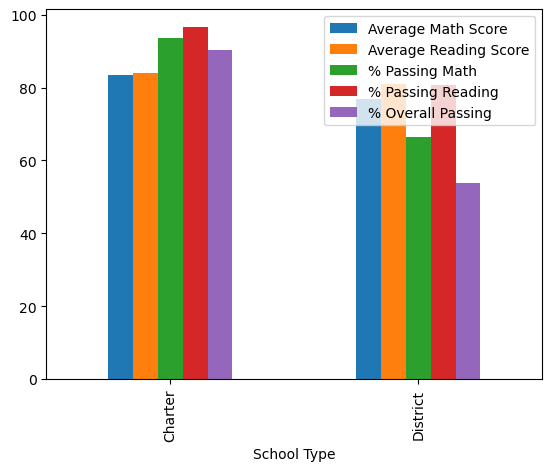

In [115]:
type_summary.plot(kind="bar")